# **Load in GTZAN Dataset**

[Drive Link to GTZAN Dataset](https://drive.google.com/drive/folders/1thlHfYV1cjNPCkuFg-e81nalDVyYf4OH)

[CRNN Model for Genre Classification - Priya Dwivedi](https://github.com/priya-dwivedi/Music_Genre_Classification)

[GTZAN Dataset with sliced audios](https://drive.google.com/drive/folders/1thlHfYV1cjNPCkuFg-e81nalDVyYf4OH?usp=sharing)

[Original GTZAN Dataset](http://marsyas.info/downloads/datasets.html)

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
#audo_dataset = open('drive/MyDrive/Data/genres_original')

#audio_dataset.read()
import pandas as pd


audio_data_3 = pd.DataFrame(pd.read_csv('drive/MyDrive/GTZAN Data/features_3_sec.csv'))

audio_data_30 = pd.DataFrame(pd.read_csv('drive/MyDrive/GTZAN Data/features_30_sec.csv'))




In [3]:
import os
##FOLDER_PATH = 'labelled-dataset'
#ROOT_PATH = '/content/drive/MyDrive/'
#print(len(os.listdir('drive/MyDrive/GTZAN Data/sliced_audios')))


# Split each audio into 10 parts (3 second clips)


In [10]:
pip install pydub

In [11]:
a = 'drive/My Drive/GTZAN Data/genres_original/blues.00000.wav'
a[42:a.index('.')]

'blues'

In [6]:
from pydub import AudioSegment
def get_wavs():
  #new_files = []
  for _file in audio_data_30['filename']:
    if not _file == 'jazz.00054.wav':
      full_file = 'drive/My Drive/GTZAN Data/genres_original/' + _file
      genre = _file[:_file.index('.')]
      start = 0
      end = 3000
      for interval in range(10):
        audio_segment = AudioSegment.from_wav(full_file)[start:end]
        new_path = 'drive/My Drive/GTZAN Data/sliced_audios/'+ _file[:_file.index('w')]+ str(interval) + '.wav'
        audio_segment.export(new_path, format="wav")
        #new_files.append((new_path, genre))
        start += 3000
        end+= 3000
  #return new_files

In [7]:
get_wavs()

OSError: ignored

In [12]:
import os

all_files = os.listdir('drive/MyDrive/GTZAN Data/sliced_audios')

In [13]:
len(all_files)

9990

'blues.00098.9.wav'

In [14]:

all_files = list(reversed(all_files))
all_files



['blues.00098.9.wav',
 'blues.00098.8.wav',
 'blues.00098.7.wav',
 'blues.00098.6.wav',
 'blues.00098.5.wav',
 'blues.00098.4.wav',
 'blues.00098.3.wav',
 'blues.00098.2.wav',
 'blues.00098.1.wav',
 'blues.00098.0.wav',
 'blues.00097.9.wav',
 'blues.00097.8.wav',
 'blues.00097.7.wav',
 'blues.00097.6.wav',
 'blues.00097.5.wav',
 'blues.00097.4.wav',
 'blues.00097.3.wav',
 'blues.00097.2.wav',
 'blues.00097.1.wav',
 'blues.00097.0.wav',
 'blues.00096.9.wav',
 'blues.00096.8.wav',
 'blues.00096.7.wav',
 'blues.00096.6.wav',
 'blues.00096.5.wav',
 'blues.00096.4.wav',
 'blues.00096.3.wav',
 'blues.00096.2.wav',
 'blues.00096.1.wav',
 'blues.00096.0.wav',
 'blues.00095.9.wav',
 'blues.00095.8.wav',
 'blues.00095.7.wav',
 'blues.00095.6.wav',
 'blues.00095.5.wav',
 'blues.00095.4.wav',
 'blues.00095.3.wav',
 'blues.00095.2.wav',
 'blues.00095.1.wav',
 'blues.00095.0.wav',
 'blues.00094.9.wav',
 'blues.00094.8.wav',
 'blues.00094.7.wav',
 'blues.00094.6.wav',
 'blues.00094.5.wav',
 'blues.00

#Make a Dictionary mapping sliced audio to its genres

In [15]:
def get_spectrogram(file):
  time_series, sample_rate = librosa.load(file, sr = 44100)
  mel_spec = librosa.feature.melspectrogram(time_series, sr = sample_rate)
  mel_spec = librosa.core.amplitude_to_db(mel_spec)

  return mel_spec

In [16]:
file_to_genre = {}
for file in all_files:
  file_to_genre[file] = file[:file.index('.')]



#Make a Dictionary mapping genre to a one hot encoding of their label

In [17]:
import numpy as np
def one_hot_encode(label, num_classes = 10):
  hot = np.zeros(num_classes)
  hot[label] = 1
  return hot



In [18]:
# First, correspong each genre to an integer to be one hot encoded
genre_to_id = {'blues': 0, 'classical': 1, 'country': 2, 
               'disco': 3, 'hiphop': 4, 'jazz': 5,
               'metal': 6, 'pop': 7, 'reggae': 8, 
               'rock':9}
genre_to_hot = {}
for genre in file_to_genre.values():
  genre_to_hot[genre] = one_hot_encode(genre_to_id[genre])

genre_to_hot


{'blues': array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'classical': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'country': array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]),
 'disco': array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]),
 'hiphop': array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]),
 'jazz': array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 'metal': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]),
 'pop': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]),
 'reggae': array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]),
 'rock': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])}

#Make Mel Spectrograms

In [21]:
import librosa

# Make a list of all spectrograms

In [ ]:
from IPython.display import Audio

Audio('drive/MyDrive/Data/'+file)

In [ ]:
audio_specs = []
for file in all_files:

  audio_specs.append(get_spectrogram('drive/MyDrive/GTZAN Data/sliced_audios/'+file))


  

In [ ]:
len(audio_specs)

999

#Cleaning up Spectrogram Data

In [ ]:

from statistics import mode
col_shapes = [spec.shape[1] for spec in audio_specs]

#print(col_shapes.count(2586) )
#print(col_shapes.count(2585))
print(len([shape for shape in col_shapes if shape > 259]))
print(len([shape for shape in col_shapes if shape < 259]))
print(mode(col_shapes))
#print(len(all_audio_specs))

0
4
259


In [ ]:
#remove = []
#print(len(audio_specs))
for i in range(len(audio_specs)):
  if audio_specs[i].shape[1] > 253:
      idxs = np.arange(253, audio_specs[i].shape[1])
      audio_specs[i] = np.delete(audio_specs[i], [idxs], axis=1)
#for spec in audio_specs:

  #print(spec.shape)





#Save spectrograms to an NPY file

In [ ]:
from numpy import asarray
from numpy import save

audio_specs= asarray(audio_specs)
save('audio_specs.npy',audio_specs)

In [ ]:
import numpy as np
audio_specs = np.load('drive/My Drive/audio_specs.npy')

In [ ]:
len(audio_specs)

999

Make Training and Validation Sets

In [ ]:
#all_labels = genre_to_hot.values()
#all_labels[:50]
all_labels = []
for genre in file_to_genre.values():
  all_labels.append(genre_to_hot[genre])

len(all_labels)

9990

In [ ]:
# Read in all values and shuffle
import numpy as np
cutoff = 0.8
inputs = np.array(audio_specs) 
idxs = np.arange(len(audio_specs))
np.random.shuffle(idxs)
print(idxs)
train_set = inputs[idxs][:int(len(audio_specs) * cutoff)]
train_labels = np.array(all_labels)[idxs][:int(len(audio_specs) * cutoff)]
test_set = inputs[idxs][int(len(audio_specs) * cutoff):]
test_labels = np.array(all_labels)[idxs][int(len(audio_specs) * cutoff):]
print(train_set[0])

#799



[423 603 623 809 233 866 763 536 262 739 537 887 778 720 551 212 686  53
 839 284 895 179 287 907 693 977 911 471 126 495 500 990 364 460 538 681
 474 429 781 710 407 550 184 717 943 912 672 811 171 559 613 577 930 638
 909 519 736 886 320 158 525 450 566 327 410 890 573 697 316 515 244 565
 929 727 365 232 321 649 862 914 541 756 704 558 908 312 689 569   2 657
 496 979 587 462 104 281 263 989  33 755  57 172 988 481 640 103 805 742
 827 752 703 242 240 354 134 416 675 389 149 221 592 574 679 113 664 193
 220 798 894 749 348 860 106 985 539 115 876  40 621 169 885 769 518 842
 182 877 888  45 987 595 795 464 488 648 427  37 626 369 643 753 406 376
 713 730 949 254  69  42  19 265 440 370 591 501 901 434 466 358 461  81
 323 674  38 789 617 528 192 386 530 531 417 575 234 654 415 540 794 120
 394 668 355 489 215 880 937 269 289 620 784 177 313 696 513 310  13 915
 308 627 385  51 757  85 190 356 237 807 594 998 266 509 437 345 286 760
 535  61 861 922 542  74 850 457 272 480 470 100 54

In [ ]:
inputs[292]

array([[ 20.53364 ,  20.233936,  17.772264, ...,  25.689217,  23.90738 ,
         20.048178],
       [ 31.731358,  32.97166 ,  33.98305 , ...,  27.780706,  28.905878,
         25.125666],
       [ 24.461105,  24.361794,  31.879084, ...,  29.394882,  29.86574 ,
         23.567589],
       ...,
       [-15.90139 , -15.90139 , -15.90139 , ..., -15.90139 , -15.90139 ,
        -15.90139 ],
       [-15.90139 , -15.90139 , -15.90139 , ..., -15.90139 , -15.90139 ,
        -15.90139 ],
       [-15.90139 , -15.90139 , -15.90139 , ..., -15.90139 , -15.90139 ,
        -15.90139 ]], dtype=float32)

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [ ]:
pip install keras-utils

  Created wheel for keras-utils: filename=keras_utils-1.0.13-py3-none-any.whl size=2657 sha256=34f284b89f8c3aeebf8ed7e56937cf563181c6da1d04ebdd615da3152e7b0587
  Stored in directory: /root/.cache/pip/wheels/d0/dd/3b/493952a5240d486a83805d65360dedadbadeae71d25e2c877f
Successfully built keras-utils


In [ ]:
def one_hot_encode(label, num_classes):
  hot = np.zeros(num_classes)
  hot[label] = 1
  return hot

In [ ]:

genre_to_id = {'blues': [1,0,0,0,0,0,0,0,0,0], 'classical': [0,1,0,0,0,0,0,0,0,0], 'country': [0,0,1,0,0,0,0,0,0,0], 
               'disco': [0,0,0,1,0,0,0,0,0,0], 'hiphop': [0,0,0,0,1,0,0,0,0,0], 'jazz': [0,0,0,0,0,1,0,0,0,0],
               'metal': [0,0,0,0,0,0,1,0,0,0], 'pop': [0,0,0,0,0,0,0,1,0,0], 'reggae': [0,0,0,0,0,0,0,0,1,0], 
               'rock': [0,0,0,0,0,0,0,0,0,1]}

train_labels = list(train_labels)
for i in range(len(train_labels)):
  
  train_labels[i] = genre_to_id[train_labels[i]]
  


test_labels = list(test_labels)
for i in range(len(test_labels)):
  test_labels[i] = genre_to_id[test_labels[i]]



In [ ]:
test_labels = np.array(test_labels)
train_labels = np.array(train_labels)

In [ ]:

import tensorflow as tf

**CRNN Model**

In [ ]:
N_LAYERS = 3
FILTER_LENGTH = 5
CONV_FILTER_COUNT = 56
batch_size = 32
LSTM_COUNT = 96
EPOCH_COUNT = 70
NUM_HIDDEN = 64
L2_regularization = 0.003

def conv_recurrent_model_build(model_input, num_classes = 10, n_layers = 3, filter_size = 5, num_filters = 56,lstm_cnt = 96, num_hidden = 64, l2_reg = 0.001):
    print('Building model...')
    layer = model_input
    
    ### 3 1D Convolution Layers
    for i in range(n_layers):
        # give name to the layers
        layer = Conv1D(
                filters=num_filters,
                kernel_size=filter_size,
                kernel_regularizer=regularizers.l2(l2_reg),  
                name='convolution_' + str(i + 1)
            )(layer)
        layer = BatchNormalization(momentum=0.9)(layer)
        layer = Activation('relu')(layer)
        layer = MaxPooling1D(2)(layer)
        layer = Dropout(0.5)(layer)
    
    ## LSTM Layer
    layer = LSTM(lstm_cnt, activation="relu", return_sequences=False)(layer)
    layer = Dropout(0.5)(layer)
    
    ## Dense Layer
    layer = Dense(num_hidden, kernel_regularizer=regularizers.l2(l2_reg), name='dense1')(layer)
    layer = Dropout(0.5)(layer)
    
    ## Softmax Output
    layer = Dense(num_classes)(layer)
    layer = Activation('softmax', name='output_realtime')(layer)
    model_output = layer
    model = Model(model_input, model_output)
    
    
    opt = SGD(learning_rate=0.01)
    model.compile(
            loss='categorical_crossentropy',
            optimizer=opt,
            metrics=['accuracy']
        )
    
    #print(model.summary())
    return model

In [ ]:
def train_model(x_train, y_train, x_val, y_val):
    
    n_features = x_train.shape[2]
    input_shape = (None, n_features)
    model_input = Input(input_shape, name='input')
    
    model = conv_recurrent_model_build(model_input)

    checkpoint = ModelCheckpoint('best_params.hd5', monitor='val_accuracy', verbose=1,
                                          save_best_only=True, mode='max')
    
    reducelr = ReduceLROnPlateau(
                monitor='val_accuracy', factor=0.5, patience=10, min_delta=0.01,
                verbose=1
            )
    callbacks = [checkpoint, reducelr]

    # Fit the model and get training history
    
    history = model.fit(x_train, y_train, batch_size=32, epochs=EPOCH_COUNT,
                        validation_data=(x_val, y_val), verbose=1, callbacks=callbacks)

    return model, history

In [ ]:
def show_summary_stats(history):
    # List all data in history
    print(history.history.keys())

    # Summarize history for accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

    # Summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

In [ ]:
import numpy as np
import os
from os.path import isfile
import keras
from keras.models import Sequential, Model
from keras.layers import Input, Dense, TimeDistributed, LSTM, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, Flatten, Conv2D, BatchNormalization, Lambda
from keras.layers.advanced_activations import ELU
from keras.callbacks import ModelCheckpoint, TensorBoard, ReduceLROnPlateau
from keras import backend
from keras.utils import np_utils
from keras.optimizers import RMSprop, SGD

from keras import regularizers

import librosa.display
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:

model, history  = train_model(train_set, train_labels, test_set, test_labels)

Building model...
Epoch 1/70
25/25 [==============================] - 58s 130ms/step - loss: 1.8830 - accuracy: 0.5428 - val_loss: 0.8801 - val_accuracy: 1.0000

Epoch 00001: val_accuracy improved from -inf to 1.00000, saving model to best_params.hd5
INFO:tensorflow:Assets written to: best_params.hd5/assets
Epoch 2/70
25/25 [==============================] - 2s 69ms/step - loss: 0.4220 - accuracy: 0.9844 - val_loss: 0.4357 - val_accuracy: 1.0000

Epoch 00002: val_accuracy did not improve from 1.00000
Epoch 3/70
25/25 [==============================] - 2s 68ms/step - loss: 0.3298 - accuracy: 0.9944 - val_loss: 0.3382 - val_accuracy: 1.0000

Epoch 00003: val_accuracy did not improve from 1.00000
Epoch 4/70
25/25 [==============================] - 2s 75ms/step - loss: 0.3181 - accuracy: 0.9966 - val_loss: 0.3125 - val_accuracy: 1.0000

Epoch 00004: val_accuracy did not improve from 1.00000
Epoch 5/70
25/25 [==============================] - 2s 70ms/step - loss: 0.3075 - accuracy: 0.9996 -

In [ ]:
train_labels.shape

(349,)

In [ ]:
train_set.shape

(349, 128, 2586)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


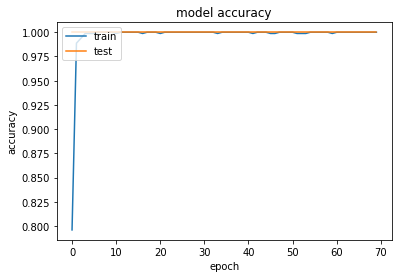

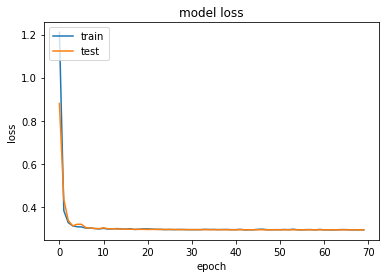

In [ ]:
show_summary_stats(history)

# DNN Model

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

data = pd.read_csv('drive/MyDrive/GTZAN Data/features_3_sec.csv')

all_labels = data['label'].unique()
label_encoder = LabelEncoder()
labels = data['label']
label_encoder.fit(labels)

data.insert(60, 'label_id', 9999)
data.insert(1, 'filename_full', '')
for i in range(len(data)):
    label = data.loc[i,'label']
    label_id =label_encoder.transform([label])
    data.loc[i,'label_id']=label_id.item()
    data.loc[i,'filename_full']=str(data.loc[i,'filename']).split('.')[0]+"."+str(data.loc[i,'filename']).split('.')[1]+"."+str(data.loc[i,'filename']).split('.')[3]
data['label_id']=data['label_id'].astype(int)

features_full = data.drop(['filename','filename_full', 'length','label', 'label_id'], axis = 1)
target_full = data['label_id'].astype('int')
features, features_test, target, target_test = train_test_split(features_full, target_full, test_size=0.25, random_state = 42, shuffle = True)

In [40]:
scaler = StandardScaler()
features = pd.DataFrame(scaler.fit_transform(features), columns=features.columns)
features_test = pd.DataFrame(scaler.transform(features_test), columns=features_test.columns)

In [49]:
import tensorflow as tf
import tensorflow.keras as k
from keras.wrappers.scikit_learn import KerasClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

def make_model():

  init = 'glorot_uniform'
  model = k.models.Sequential([
        k.layers.Dense(1024, activation='relu', kernel_initializer=init, input_shape=(features.shape[1],)),
        k.layers.Dropout(0.4),
        k.layers.BatchNormalization(), 
          
        k.layers.Dense(512, activation='relu', kernel_initializer=init),
        k.layers.Dropout(0.4),
        k.layers.BatchNormalization(),                                                  
        
        k.layers.Dense(256, activation='relu', kernel_initializer=init),
        k.layers.Dropout(0.4),
        k.layers.BatchNormalization(),
          
        k.layers.Dense(128, kernel_initializer=init, activation='relu'),
        k.layers.Dropout(0.4),
        k.layers.BatchNormalization(),
          
        k.layers.Dense(64, kernel_initializer=init, activation='relu'),
        k.layers.Dropout(0.4),
        k.layers.BatchNormalization(),

        k.layers.Dense(10, activation='softmax'),
      ])
  
  model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
  return model

Epoch 1/100
59/59 [==============================] - 2s 7ms/step - loss: 2.0694 - accuracy: 0.2918
Epoch 2/100
59/59 [==============================] - 0s 7ms/step - loss: 1.4974 - accuracy: 0.4764
Epoch 3/100
59/59 [==============================] - 0s 7ms/step - loss: 1.2533 - accuracy: 0.5689
Epoch 4/100
59/59 [==============================] - 0s 7ms/step - loss: 1.0984 - accuracy: 0.6245
Epoch 5/100
59/59 [==============================] - 0s 7ms/step - loss: 0.9914 - accuracy: 0.6735
Epoch 6/100
59/59 [==============================] - 0s 7ms/step - loss: 0.9077 - accuracy: 0.7044
Epoch 7/100
59/59 [==============================] - 0s 7ms/step - loss: 0.8369 - accuracy: 0.7245
Epoch 8/100
59/59 [==============================] - 0s 7ms/step - loss: 0.7793 - accuracy: 0.7449
Epoch 9/100
59/59 [==============================] - 0s 7ms/step - loss: 0.7414 - accuracy: 0.7678
Epoch 10/100
59/59 [==============================] - 0s 8ms/step - loss: 0.6924 - accuracy: 0.7846
Epoch 11/

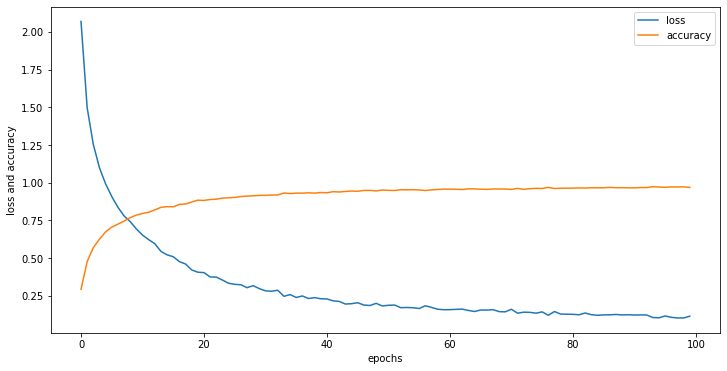

In [52]:
model =  KerasClassifier(build_fn=make_model, epochs=100, batch_size=128)
history = model.fit(features, target)
pd.DataFrame(history.history).plot(figsize=(12,6))
plt.xlabel("epochs")
plt.ylabel("loss and accuracy") 
plt.show()

In [51]:
preds = model.predict(features_test)
accuracy = accuracy_score(target_test, preds)
print('accuracy score = {:.4f}'.format(accuracy))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


accuracy score = 0.9335
